In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('tempdb.sqlite') #выборка 365 элементов в БД
query = "SELECT * FROM Results"
#выбираем из таблицы влажность в интересующем диапазоне

df = pd.read_sql_query(query,conn)

df

,temp_C,temp_K,temp_F,humidity
0,27.4,300.55,81.32,49.0
1,27.3,300.45,81.14,49.0
2,27.3,300.45,81.14,49.0
3,27.4,300.55,81.32,52.0
4,27.4,300.55,81.32,58.0
...,...,...,...,...
360,32.3,305.45,90.14,44.0
361,32.1,305.25,89.78,45.0
362,32.1,305.25,89.78,45.0
363,32.1,305.25,89.78,45.0


Idiomatic Pandas
#выполняется пошагово в выборке на примере

In [2]:
(df.where(df['humidity']==45)
    .dropna()
    #.set_index(['STNAME','CTYNAME'])
    .rename(columns={'temp_C': 'По Цельсию'}))

,По Цельсию,temp_K,temp_F,humidity
340,33.6,306.75,92.48,45.0
341,33.6,306.75,92.48,45.0
342,33.4,306.55,92.12,45.0
343,33.4,306.55,92.12,45.0
344,33.3,306.45,91.94,45.0
345,33.2,306.35,91.76,45.0
346,33.2,306.35,91.76,45.0
347,33.1,306.25,91.58,45.0
348,33.1,306.25,91.58,45.0
349,33.0,306.15,91.40,45.0


In [3]:
dates = pd.date_range(start='1/1/2020', end='30/12/2020', periods=365)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=365, freq=None)

In [4]:
g = pd.date_range(start='1/1/2020', end='30/12/2020')
g


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [5]:
#новый df добавим дату в новый столбец, и затем назначим его индексами
df2 = pd.read_sql_query(query,conn)
df2['Date'] = g
df2 = df2.set_index('Date')
df2

,temp_C,temp_K,temp_F,humidity
Date,,,,
2020-01-01,27.4,300.55,81.32,49.0
2020-01-02,27.3,300.45,81.14,49.0
2020-01-03,27.3,300.45,81.14,49.0
2020-01-04,27.4,300.55,81.32,52.0
2020-01-05,27.4,300.55,81.32,58.0
...,...,...,...,...
2020-12-26,32.3,305.45,90.14,44.0
2020-12-27,32.1,305.25,89.78,45.0
2020-12-28,32.1,305.25,89.78,45.0


In [6]:
df_d = pd.read_sql_query(query,conn)
df_d['Date'] = dates

(df_d.where(df_d['humidity']==45)
    .dropna()
    .set_index(['Date'])
    .rename(columns={'temp_C': 'По Цельсию'}))

,По Цельсию,temp_K,temp_F,humidity
Date,,,,
2020-12-06,33.6,306.75,92.48,45.0
2020-12-07,33.6,306.75,92.48,45.0
2020-12-08,33.4,306.55,92.12,45.0
2020-12-09,33.4,306.55,92.12,45.0
2020-12-10,33.3,306.45,91.94,45.0
2020-12-11,33.2,306.35,91.76,45.0
2020-12-12,33.2,306.35,91.76,45.0
2020-12-13,33.1,306.25,91.58,45.0
2020-12-14,33.1,306.25,91.58,45.0


In [7]:
df3.loc[2] 

NameError: name 'df3' is not defined

In [ ]:
df3_ransposed = df3.T
df3_ransposed



In [8]:
# ВЫЗЫВАЕМ ЗА КОНКРЕТНЫЕ ДАТЫ, КОНКРЕТНЫЕ ДАННЫЕ!!!! ФОРМА ИМЕННО ТАКАЯ!!!!! 
df2.loc['20201213':'20201216','temp_K':'humidity']  

,temp_K,temp_F,humidity
Date,,,
2020-12-13,306.25,91.58,45.0
2020-12-14,306.25,91.58,45.0
2020-12-15,306.15,91.40,45.0
2020-12-16,306.05,91.22,44.0


In [9]:
import numpy as np


In [41]:
df2

,temp_C,temp_K,temp_F,humidity
Date,,,,
2020-01-01,27.4,300.55,81.32,49.0
2020-01-02,27.3,300.45,81.14,49.0
2020-01-03,27.3,300.45,81.14,49.0
2020-01-04,27.4,300.55,81.32,52.0
2020-01-05,27.4,300.55,81.32,58.0
...,...,...,...,...
2020-12-26,32.3,305.45,90.14,44.0
2020-12-27,32.1,305.25,89.78,45.0
2020-12-28,32.1,305.25,89.78,45.0


In [11]:
df4 = df2.agg({'temp_C': np.max})
df4

temp_C    36.4
dtype: float64

Функция Pandas dataframe.mean () возвращает среднее значение для запрошенной оси. Если метод применяется к объекту серии панд, метод возвращает скалярное значение, которое является средним значением всех наблюдений в кадре данных. Если метод применяется к объекту данных pandas, метод возвращает объект серии pandas, который содержит среднее значение по указанной оси

In [12]:
df2.mean(axis = 0) 

temp_C       34.754795
temp_K      307.904795
temp_F       94.558630
humidity     87.591781
dtype: float64

In [13]:
df2.groupby(['humidity']).mean()

,temp_C,temp_K,temp_F
humidity,,,
44.0,32.572727,305.722727,90.630909
45.0,32.942857,306.092857,91.297143
46.0,33.916667,307.066667,93.050000
47.0,34.233333,307.383333,93.620000
48.0,34.450000,307.600000,94.010000
49.0,30.240000,303.390000,86.432000
50.0,34.700000,307.850000,94.460000
51.0,34.800000,307.950000,94.640000
52.0,31.100000,304.250000,87.980000


Под «группировкой» подразумевается процесс, включающий один или несколько из следующих шагов: 
1. Разделение данных на группы по некоторым критериям. 
2. Применение функции к каждой группе независимо. 
3. Объединение результатов в структуру данных.

In [14]:
grouped = df2.groupby('humidity')
grouped

In [15]:
grouped3 = df2.groupby(['temp_K', 'temp_F'])
grouped3

In [17]:
from math import sqrt
grouped4 = df2.agg({'temp_C': sqrt})
grouped4

,temp_C
Date,
2020-01-01,5.234501
2020-01-02,5.224940
2020-01-03,5.224940
2020-01-04,5.234501
2020-01-05,5.234501
...,...
2020-12-26,5.683309
2020-12-27,5.665686
2020-12-28,5.665686


In [18]:
print(pd.pivot_table(df2, index=['temp_C','temp_F']))

                humidity  temp_K
temp_C temp_F                   
27.3   81.14   49.000000  300.45
27.4   81.32   53.000000  300.55
27.5   81.50   66.000000  300.65
27.6   81.68   76.000000  300.75
27.7   81.86   88.000000  300.85
...                  ...     ...
36.0   96.80   94.250000  309.15
36.1   96.98   95.000000  309.25
36.2   97.16   94.692308  309.35
36.3   97.34   95.000000  309.45
36.4   97.52   95.000000  309.55

[71 rows x 2 columns]


In [19]:
#пример сводной таблицы
print(pd.pivot_table(df2, index=['temp_C','temp_F'], aggfunc=[np.mean,np.max], margins=True))

                    mean                 amax        
                humidity      temp_K humidity  temp_K
temp_C temp_F                                        
27.3   81.14   49.000000  300.450000     49.0  300.45
27.4   81.32   53.000000  300.550000     58.0  300.55
27.5   81.5    66.000000  300.650000     69.0  300.65
27.6   81.68   76.000000  300.750000     76.0  300.75
27.7   81.86   88.000000  300.850000     88.0  300.85
...                  ...         ...      ...     ...
36.1   96.98   95.000000  309.250000     95.0  309.25
36.2   97.16   94.692308  309.350000     95.0  309.35
36.3   97.34   95.000000  309.450000     95.0  309.45
36.4   97.52   95.000000  309.550000     95.0  309.55
All            87.591781  307.904795     95.0  309.55

[72 rows x 4 columns]


In [20]:
#фрейм дат измерений, проводимых каждые две недели по воскресеньям
dates = pd.date_range(start='2020-01-01', end='2020-12-30', freq='2W-SUN')
dates

DatetimeIndex(['2020-01-05', '2020-01-19', '2020-02-02', '2020-02-16',
               '2020-03-01', '2020-03-15', '2020-03-29', '2020-04-12',
               '2020-04-26', '2020-05-10', '2020-05-24', '2020-06-07',
               '2020-06-21', '2020-07-05', '2020-07-19', '2020-08-02',
               '2020-08-16', '2020-08-30', '2020-09-13', '2020-09-27',
               '2020-10-11', '2020-10-25', '2020-11-08', '2020-11-22',
               '2020-12-06', '2020-12-20'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [21]:
#измерения, проводимых каждые две недели по воскресеньям
df_sun = df2.loc[dates,'temp_K':'humidity'] 
df_sun

,temp_K,temp_F,humidity
2020-01-05,300.55,81.32,58.0
2020-01-19,302.65,85.10,95.0
2020-02-02,304.95,89.24,95.0
2020-02-16,306.25,91.58,95.0
2020-03-01,307.15,93.20,95.0
2020-03-15,307.55,93.92,95.0
2020-03-29,307.95,94.64,95.0
2020-04-12,308.25,95.18,95.0
2020-04-26,308.45,95.54,95.0
2020-05-10,308.75,96.08,95.0


In [22]:
#Посмотрим разницу между значениями
df_sun.diff()

,temp_K,temp_F,humidity
2020-01-05,NaN,NaN,NaN
2020-01-19,2.1,3.78,37.0
2020-02-02,2.3,4.14,0.0
2020-02-16,1.3,2.34,0.0
2020-03-01,0.9,1.62,0.0
2020-03-15,0.4,0.72,0.0
2020-03-29,0.4,0.72,0.0
2020-04-12,0.3,0.54,0.0
2020-04-26,0.2,0.36,0.0
2020-05-10,0.3,0.54,0.0


In [23]:
#СРЕДНЕЕ ЧИСЛО КАЖДОГО МЕСЯЦА
df_sun.resample('M').mean()

,temp_K,temp_F,humidity
2020-01-31,301.600000,83.21,76.5
2020-02-29,305.600000,90.41,95.0
2020-03-31,307.550000,93.92,95.0
2020-04-30,308.350000,95.36,95.0
2020-05-31,308.850000,96.26,95.0
2020-06-30,309.200000,96.89,95.0
2020-07-31,309.400000,97.25,95.0
2020-08-31,309.516667,97.46,95.0
2020-09-30,309.550000,97.52,95.0
2020-10-31,309.550000,97.52,95.0


In [24]:
#Мы можем использовать частичное индексирование строк, чтобы найти значения за определенный год 
#или за определенный месяц, или мы можем даже нарезать диапазон дат
df_sun['2020-04']

,temp_K,temp_F,humidity
2020-04-12,308.25,95.18,95.0
2020-04-26,308.45,95.54,95.0


In [25]:
df_sun['2020-11':]

,temp_K,temp_F,humidity
2020-11-08,309.05,96.62,80.0
2020-11-22,307.85,94.46,50.0
2020-12-06,306.75,92.48,45.0
2020-12-20,305.75,90.68,44.0


In [26]:
#изменить частоту с двухнедельных на еженедельные, будем получать пропущенные значения каждую вторую неделю.
df_sun.asfreq('W', method='ffill')

,temp_K,temp_F,humidity
2020-01-05,300.55,81.32,58.0
2020-01-12,300.55,81.32,58.0
2020-01-19,302.65,85.10,95.0
2020-01-26,302.65,85.10,95.0
2020-02-02,304.95,89.24,95.0
2020-02-09,304.95,89.24,95.0
2020-02-16,306.25,91.58,95.0
2020-02-23,306.25,91.58,95.0
2020-03-01,307.15,93.20,95.0
2020-03-08,307.15,93.20,95.0


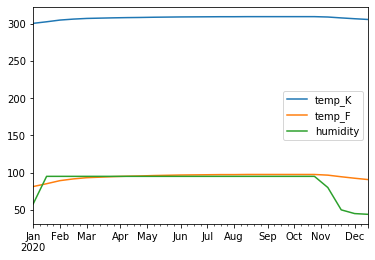

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

df_sun.plot()

СТАТИСТИКА

In [30]:
x = df2.mean(axis = 0) 
x

temp_C       34.754795
temp_K      307.904795
temp_F       94.558630
humidity     87.591781
dtype: float64

In [29]:
np.std(x)

104.60703705636254

In [34]:
#фрейм индексов дат измерений, первого полугодия
dates_1h = pd.date_range(start='2020-01-01', end='2020-06-01')
dates_1h
#early = df2[df2['humidity'] <= '2020-06-01']
#late = df2[df2['humidity'] > '2020-06-02']

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
               '2020-05-31', '2020-06-01'],
              dtype='datetime64[ns]', length=153, freq='D')

In [35]:
dates_2h = pd.date_range(start='2020-06-02', end='2020-12-30')
dates_2h

DatetimeIndex(['2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=212, freq='D')

In [37]:
#СРЕДНЯЯ ВЛАЖНОСТЬ ЗА 1 ПОЛУГОДИЕ
df_1h = df2.loc[dates_1h,'humidity'] 
df_1h.mean()

93.02614379084967

In [38]:
#СРЕДНЯЯ ВЛАЖНОСТЬ ЗА 2 ПОЛУГОДИЕ
df_2h = df2.loc[dates_2h,'humidity'] 
df_2h.mean()

83.66981132075472

In [32]:
df2

,temp_C,temp_K,temp_F,humidity
Date,,,,
2020-01-01,27.4,300.55,81.32,49.0
2020-01-02,27.3,300.45,81.14,49.0
2020-01-03,27.3,300.45,81.14,49.0
2020-01-04,27.4,300.55,81.32,52.0
2020-01-05,27.4,300.55,81.32,58.0
...,...,...,...,...
2020-12-26,32.3,305.45,90.14,44.0
2020-12-27,32.1,305.25,89.78,45.0
2020-12-28,32.1,305.25,89.78,45.0
